In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [ ]:
import zipfile
import os
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("emotion_dataset")
os.listdir("emotion_dataset")

['train.txt', 'val.txt', 'test.txt']

In [ ]:
import pandas as pd

# Load train data
train_df = pd.read_csv("emotion_dataset/train.txt", sep=';', names=["text", "emotion"])
train_df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
import nltk

nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
train_df = pd.read_csv("emotion_dataset/train.txt", sep=';', names=["text", "emotion"])

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

train_df['clean_text'] = train_df['text'].apply(preprocess)

In [18]:
train_df[['text', 'clean_text', 'emotion']].head(10)

,text,clean_text,emotion
0,i didnt feel humiliated,didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,love
4,i am feeling grouchy,feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,ive feeling little burdened lately wasnt sure,sadness
6,ive been taking or milligrams or times recomme...,ive taking milligrams times recommended amount...,surprise
7,i feel as confused about life as a teenager or...,feel confused life teenager jaded year old man,fear
8,i have been with petronas for years i feel tha...,petronas years feel petronas performed well ma...,joy
9,i feel romantic too,feel romantic,love


In [19]:
print("Original text: ", train_df['text'][0])
print("Cleaned text: ", train_df['clean_text'][0])

Original text:  i didnt feel humiliated
Cleaned text:  didnt feel humiliated


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit on training data and transform
X = vectorizer.fit_transform(train_df['clean_text'])

# Labels (target)
y = train_df['emotion']

# Show shape of the matrix (rows = sentences, columns = unique words)
print("TF-IDF Matrix Shape:", X.shape)

TF-IDF Matrix Shape: (16000, 5000)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

print("✅ Model training complete!")

✅ Model training complete!


📋 Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       427
        fear       0.85      0.78      0.81       397
         joy       0.82      0.96      0.88      1021
        love       0.89      0.62      0.73       296
     sadness       0.90      0.94      0.92       946
    surprise       0.88      0.47      0.61       113

    accuracy                           0.86      3200
   macro avg       0.87      0.76      0.80      3200
weighted avg       0.87      0.86      0.86      3200



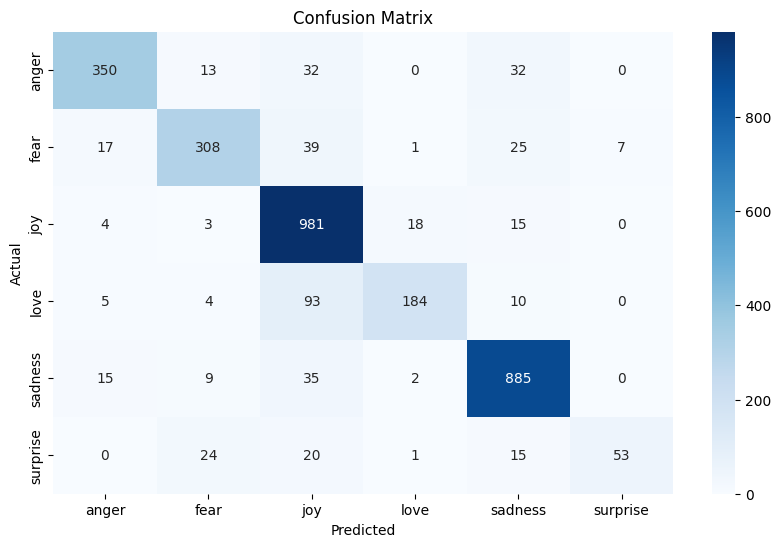

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Show classification report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
import joblib

joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [24]:
def predict_emotion(text):
    clean = preprocess(text)
    vec = vectorizer.transform([clean])
    return model.predict(vec)[0]

predict_emotion("I'm really disappointed and upset.")

'sadness'

In [25]:
train_df['emotion'].value_counts()

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

from google.colab import files

files.download('emotion_model.pkl')
files.download('tfidf_vectorizer.pkl')